Success A: 973
Success B: 1134
Z-test statistic: -3.7082330910968526
P-value: 0.0002087104961799253


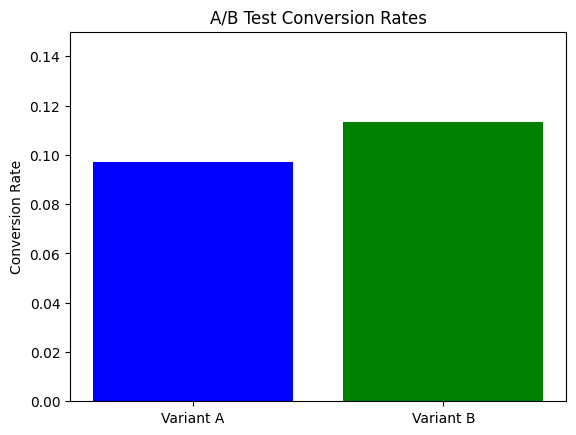

In [ ]:
# 1. Simulate Data
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

# Set seed for reproducibility
np.random.seed(42)

# Assume 10,000 visitors each for variant A and B
n_A, p_A = 10000, 0.10  # Variant A (10% true conversion rate)
n_B, p_B = 10000, 0.12  # Variant B (12% true conversion rate)

# Simulate number of purchases (successes)
success_A = np.random.binomial(n_A, p_A)
success_B = np.random.binomial(n_B, p_B)

print("Success A:", success_A)
print("Success B:", success_B)

# Perform a proportions Z-test
count = np.array([success_A, success_B])
nobs = np.array([n_A, n_B])
stat, pval = proportions_ztest(count, nobs)

print("Z-test statistic:", stat)
print("P-value:", pval)

# Optional: Plotting conversion rates
conversion_rates = [success_A / n_A, success_B / n_B]
labels = ['Variant A', 'Variant B']

plt.bar(labels, conversion_rates, color=['blue', 'green'])
plt.ylabel('Conversion Rate')
plt.title('A/B Test Conversion Rates')
plt.ylim(0, 0.15)
plt.show()


Conversion Rate (CR) and  95% Confidence Interval (CI)


In [ ]:
import numpy as np
from scipy import stats

# Conversion rates
cr_A = success_A / n_A
cr_B = success_B / n_B

# Function to calculate 95% Confidence Interval for a proportion
def calc_ci(conversions, n, z=1.96):
    p_hat = conversions / n
    se = np.sqrt(p_hat * (1 - p_hat) / n)  # standard error
    ci_lower = p_hat - z * se
    ci_upper = p_hat + z * se
    return p_hat, (ci_lower, ci_upper)

# Calculate CR and 95% CI for both variants
cr_A, ci_A = calc_ci(success_A, n_A)
cr_B, ci_B = calc_ci(success_B, n_B)

print(f"Variant A: Conversion Rate = {cr_A:.4f}, 95% CI = [{ci_A[0]:.4f}, {ci_A[1]:.4f}]")
print(f"Variant B: Conversion Rate = {cr_B:.4f}, 95% CI = [{ci_B[0]:.4f}, {ci_B[1]:.4f}]")


Variant A: Conversion Rate = 0.0973, 95% CI = [0.0915, 0.1031]
Variant B: Conversion Rate = 0.1134, 95% CI = [0.1072, 0.1196]


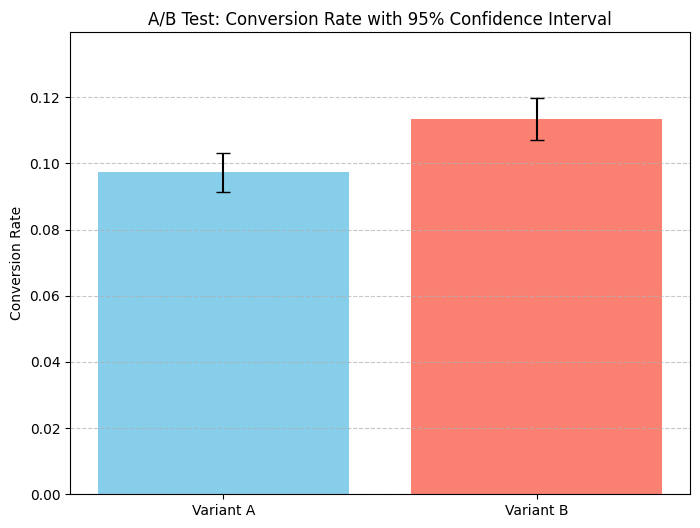

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
variants = ['Variant A', 'Variant B']
conversion_rates = [cr_A, cr_B]
ci_lower = [cr_A - ci_A[0], cr_B - ci_B[0]]
ci_upper = [ci_A[1] - cr_A, ci_B[1] - cr_B]
error = [ci_lower, ci_upper]  # asymmetric error bars

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(
    variants,
    conversion_rates,
    yerr=error,
    capsize=5,
    color=['skyblue', 'salmon']
)
plt.ylabel('Conversion Rate')
plt.title('A/B Test: Conversion Rate with 95% Confidence Interval')
plt.ylim(0, max(ci_A[1], ci_B[1]) + 0.02)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


What is a Two-Proportion Z-Test?

It’s used to compare the proportions (conversion rates) from two independent groups to see if there's a statistically significant difference.

Hypotheses:

Null Hypothesis (H₀): There is no difference in conversion rates (p_A = p_B)

Alternative Hypothesis (H₁): There is a difference (p_A ≠ p_B)

Interpretation:

If p-value < 0.05, the difference is statistically significant.

The Z-statistic tells you how many standard deviations the observed difference is from the null hypothesis.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Inputs
count = np.array([success_A, success_B])   # number of conversions
nobs = np.array([n_A, n_B])                # number of visitors

# Run the two-proportion z-test
z_stat, p_value = proportions_ztest(count, nobs)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis — Significant difference in conversion rates.")
else:
    print("Fail to reject the null hypothesis — No significant difference in conversion rates.")


Z-statistic: -3.7082
P-value: 0.0002
Reject the null hypothesis — Significant difference in conversion rates.


Real-Time Monitoring & Sequential Testing

This step involves observing your A/B test over time and deciding when to stop based on results so far — but without invalidating your statistics.

Why This Matters:

In real-world A/B testing, we often monitor results daily, but:

  Peeking too often (checking repeatedly) can inflate Type I error (false positives).

  Standard p-values assume a fixed sample size — so early stopping without corrections is risky.

| Feature                 | Fixed Testing            | Sequential Testing                         |
| ----------------------- | ------------------------ | ------------------------------------------ |
| Sample size             | Fixed before test starts | Can stop early                             |
| P-value interpretation  | Valid once at the end    | Requires correction (e.g., alpha spending) |
| Flexibility             | Low                      | High                                       |
| Risk of false positives | Controlled               | Needs adjustment                           |

Real-Time Monitoring Example (Simulation):

You can simulate this by:

1. Running the A/B test in daily increments.

2. Tracking conversions daily.

3. Calculating running totals and running p-values.

4. Applying adjustments like:

  Bonferroni correction

  Alpha spending functions

  Bayesian approaches (like stopping if posterior probability > threshold)


In [ ]:
daily_visitors = 100
days = 20
alpha = 0.05

# True rates
true_p_A = 0.10
true_p_B = 0.12

# Track running totals
total_A = total_B = 0
success_A = success_B = 0

for day in range(1, days + 1):
    # Simulate daily conversions
    conv_A = np.random.binomial(daily_visitors, true_p_A)
    conv_B = np.random.binomial(daily_visitors, true_p_B)

    success_A += conv_A
    success_B += conv_B
    total_A += daily_visitors
    total_B += daily_visitors

    # Z-test
    z_stat, p_val = proportions_ztest([success_A, success_B], [total_A, total_B])

    print(f"Day {day}: p-value = {p_val:.4f}", end=' ')
    if p_val < alpha:
        print("➡️ Stop early: Statistically significant result.")
        break
    else:
        print("Continue testing.")


Day 1: p-value = 0.6022 Continue testing.
Day 2: p-value = 0.2945 Continue testing.
Day 3: p-value = 0.3220 Continue testing.
Day 4: p-value = 0.5442 Continue testing.
Day 5: p-value = 0.3860 Continue testing.
Day 6: p-value = 0.2093 Continue testing.
Day 7: p-value = 0.1066 Continue testing.
Day 8: p-value = 0.2380 Continue testing.
Day 9: p-value = 0.3410 Continue testing.
Day 10: p-value = 0.0858 Continue testing.
Day 11: p-value = 0.1253 Continue testing.
Day 12: p-value = 0.1387 Continue testing.
Day 13: p-value = 0.1559 Continue testing.
Day 14: p-value = 0.0925 Continue testing.
Day 15: p-value = 0.0223 ➡️ Stop early: Statistically significant result.


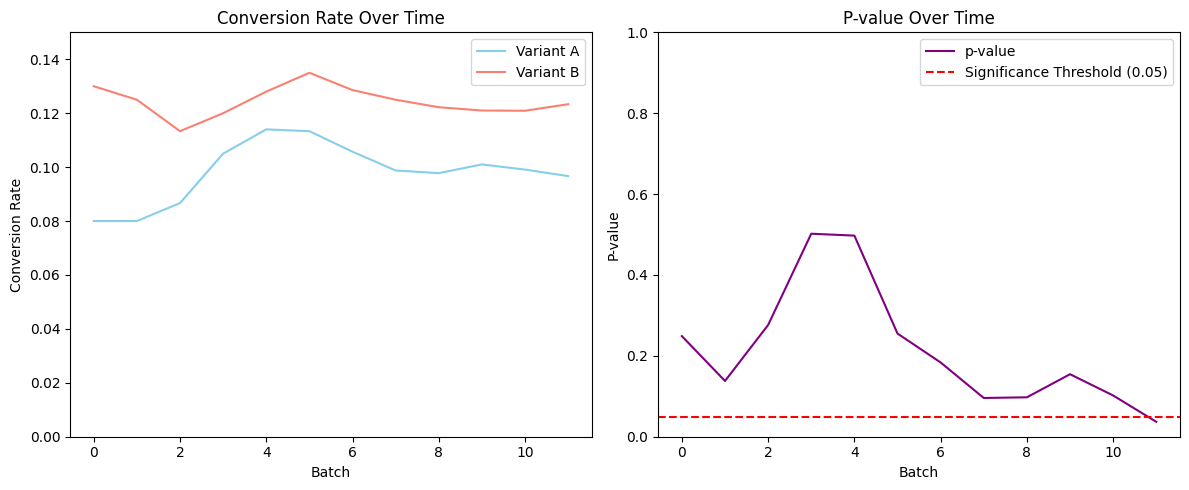

Batch 12: p-value = 0.0368
➡️ Statistically significant difference detected! Consider stopping the test.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from statsmodels.stats.proportion import proportions_ztest
from IPython.display import clear_output

# True conversion rates
true_p_A = 0.10
true_p_B = 0.12

batch_size = 100     # visitors per batch
n_batches = 60       # total time steps

# Initialize counters
total_A = total_B = 0
success_A = success_B = 0

# Lists for plotting
p_values = []
conversion_A = []
conversion_B = []

# Real-time simulation loop
for batch in range(1, n_batches + 1):
    # Simulate conversions for this batch
    conv_A = np.random.binomial(batch_size, true_p_A)
    conv_B = np.random.binomial(batch_size, true_p_B)

    # Update totals
    total_A += batch_size
    total_B += batch_size
    success_A += conv_A
    success_B += conv_B

    # Calculate p-value with two-proportion z-test
    count = np.array([success_A, success_B])
    nobs = np.array([total_A, total_B])
    z_stat, p_val = proportions_ztest(count, nobs)

    # Save for plotting
    p_values.append(p_val)
    conversion_A.append(success_A / total_A)
    conversion_B.append(success_B / total_B)

    # Real-time plot
    clear_output(wait=True)
    plt.figure(figsize=(12, 5))

    # Plot conversion rates
    plt.subplot(1, 2, 1)
    plt.plot(conversion_A, label="Variant A", color="skyblue")
    plt.plot(conversion_B, label="Variant B", color="salmon")
    plt.title("Conversion Rate Over Time")
    plt.xlabel("Batch")
    plt.ylabel("Conversion Rate")
    plt.ylim(0, 0.15)
    plt.legend()

    # Plot p-values
    plt.subplot(1, 2, 2)
    plt.plot(p_values, label="p-value", color="purple")
    plt.axhline(y=0.05, color='red', linestyle='--', label="Significance Threshold (0.05)")
    plt.title("P-value Over Time")
    plt.xlabel("Batch")
    plt.ylabel("P-value")
    plt.ylim(0, 1)
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"Batch {batch}: p-value = {p_val:.4f}")
    if p_val < 0.05:
        print("➡️ Statistically significant difference detected! Consider stopping the test.")
        break

      time.sleep(0.5)  # simulate delay for real-time effect
